In [2]:
import nltk
nltk.download('gutenberg')
from nltk.corpus import gutenberg
import pandas as pd

data=gutenberg.raw('shakespeare-hamlet.txt')

with open('hamlet.txt', 'w') as f:
    f.write(data)

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\farde\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


In [3]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

with open('hamlet.txt', 'r') as f:
    text = f.read().lower()

tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
total_words = len(tokenizer.word_index) + 1

In [4]:
total_words

4818

In [5]:
tokenizer.word_index

{'the': 1,
 'and': 2,
 'to': 3,
 'of': 4,
 'i': 5,
 'you': 6,
 'a': 7,
 'my': 8,
 'it': 9,
 'in': 10,
 'that': 11,
 'ham': 12,
 'is': 13,
 'not': 14,
 'his': 15,
 'this': 16,
 'with': 17,
 'your': 18,
 'but': 19,
 'for': 20,
 'me': 21,
 'lord': 22,
 'as': 23,
 'what': 24,
 'he': 25,
 'be': 26,
 'so': 27,
 'him': 28,
 'haue': 29,
 'king': 30,
 'will': 31,
 'no': 32,
 'our': 33,
 'we': 34,
 'on': 35,
 'are': 36,
 'if': 37,
 'all': 38,
 'then': 39,
 'shall': 40,
 'by': 41,
 'thou': 42,
 'come': 43,
 'or': 44,
 'hamlet': 45,
 'good': 46,
 'do': 47,
 'hor': 48,
 'her': 49,
 'let': 50,
 'now': 51,
 'thy': 52,
 'how': 53,
 'more': 54,
 'they': 55,
 'from': 56,
 'enter': 57,
 'at': 58,
 'was': 59,
 'oh': 60,
 'like': 61,
 'most': 62,
 'there': 63,
 'well': 64,
 'know': 65,
 'selfe': 66,
 'would': 67,
 'them': 68,
 'loue': 69,
 'may': 70,
 "'tis": 71,
 'vs': 72,
 'sir': 73,
 'qu': 74,
 'which': 75,
 'did': 76,
 'why': 77,
 'laer': 78,
 'giue': 79,
 'thee': 80,
 'ile': 81,
 'must': 82,
 'hath': 

In [6]:
inputsequences = []
for line in text.split('\n'):
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i + 1]
        inputsequences.append(n_gram_sequence)

In [7]:
inputsequences

[[1, 687],
 [1, 687, 4],
 [1, 687, 4, 45],
 [1, 687, 4, 45, 41],
 [1, 687, 4, 45, 41, 1886],
 [1, 687, 4, 45, 41, 1886, 1887],
 [1, 687, 4, 45, 41, 1886, 1887, 1888],
 [1180, 1889],
 [1180, 1889, 1890],
 [1180, 1889, 1890, 1891],
 [57, 407],
 [57, 407, 2],
 [57, 407, 2, 1181],
 [57, 407, 2, 1181, 177],
 [57, 407, 2, 1181, 177, 1892],
 [407, 1182],
 [407, 1182, 63],
 [408, 162],
 [408, 162, 377],
 [408, 162, 377, 21],
 [408, 162, 377, 21, 247],
 [408, 162, 377, 21, 247, 882],
 [18, 66],
 [451, 224],
 [451, 224, 248],
 [451, 224, 248, 1],
 [451, 224, 248, 1, 30],
 [408, 407],
 [451, 25],
 [408, 6],
 [408, 6, 43],
 [408, 6, 43, 62],
 [408, 6, 43, 62, 1893],
 [408, 6, 43, 62, 1893, 96],
 [408, 6, 43, 62, 1893, 96, 18],
 [408, 6, 43, 62, 1893, 96, 18, 566],
 [451, 71],
 [451, 71, 51],
 [451, 71, 51, 1894],
 [451, 71, 51, 1894, 567],
 [451, 71, 51, 1894, 567, 378],
 [451, 71, 51, 1894, 567, 378, 80],
 [451, 71, 51, 1894, 567, 378, 80, 3],
 [451, 71, 51, 1894, 567, 378, 80, 3, 273],
 [451, 71

In [8]:
max_sequence_length = max([len(x) for x in inputsequences])
max_sequence_length

14

In [9]:
inputsequences=np.array(pad_sequences(inputsequences, maxlen=max_sequence_length, padding='pre'))
inputsequences

array([[   0,    0,    0, ...,    0,    1,  687],
       [   0,    0,    0, ...,    1,  687,    4],
       [   0,    0,    0, ...,  687,    4,   45],
       ...,
       [   0,    0,    0, ...,    4,   45, 1047],
       [   0,    0,    0, ...,   45, 1047,    4],
       [   0,    0,    0, ..., 1047,    4,  193]])

In [10]:
import tensorflow as tf
x,y=inputsequences[:,:-1],inputsequences[:,-1]

In [11]:
x

array([[   0,    0,    0, ...,    0,    0,    1],
       [   0,    0,    0, ...,    0,    1,  687],
       [   0,    0,    0, ...,    1,  687,    4],
       ...,
       [   0,    0,    0, ...,  687,    4,   45],
       [   0,    0,    0, ...,    4,   45, 1047],
       [   0,    0,    0, ...,   45, 1047,    4]])

In [12]:
y

array([ 687,    4,   45, ..., 1047,    4,  193])

In [13]:
y=tf.keras.utils.to_categorical(y, num_classes=total_words)
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout,GRU

In [16]:
model=Sequential([
    Embedding(total_words,100,input_length=max_sequence_length-1),
    LSTM(150, return_sequences=True),
    Dropout(0.2),
    LSTM(100),
    Dense(total_words, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 13, 100)           481800    
                                                                 
 lstm (LSTM)                 (None, 13, 150)           150600    
                                                                 
 dropout (Dropout)           (None, 13, 150)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               100400    
                                                                 
 dense (Dense)               (None, 4818)              486618    
                                                                 
Total params: 1,219,418
Trainable params: 1,219,418
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [21]:
history=model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), verbose=1.callbacks=[early_stopping])

Epoch 1/50
644/644 [==============================] - 7s 12ms/step - loss: 2.3829 - accuracy: 0.4710 - val_loss: 11.9853 - val_accuracy: 0.0544
Epoch 2/50
644/644 [==============================] - 7s 11ms/step - loss: 2.3502 - accuracy: 0.4788 - val_loss: 12.0778 - val_accuracy: 0.0528
Epoch 3/50
644/644 [==============================] - 7s 11ms/step - loss: 2.3339 - accuracy: 0.4811 - val_loss: 12.1199 - val_accuracy: 0.0542
Epoch 4/50
644/644 [==============================] - 7s 11ms/step - loss: 2.3097 - accuracy: 0.4850 - val_loss: 12.2117 - val_accuracy: 0.0513
Epoch 5/50
644/644 [==============================] - 7s 11ms/step - loss: 2.2814 - accuracy: 0.4912 - val_loss: 12.2858 - val_accuracy: 0.0542
Epoch 6/50
644/644 [==============================] - 7s 11ms/step - loss: 2.2620 - accuracy: 0.4960 - val_loss: 12.2961 - val_accuracy: 0.0517
Epoch 7/50
644/644 [==============================] - 7s 11ms/step - loss: 2.2312 - accuracy: 0.5025 - val_loss: 12.3722 - val_accuracy:

<Axes: >

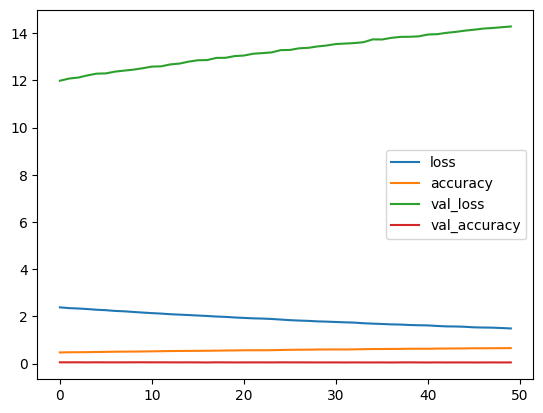

In [35]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot()

In [22]:
def predict_next_word(model, tokenizer, text, max_sequence_length):
    token_list = tokenizer.texts_to_sequences([text])[0]
    if len(token_list) >= max_sequence_length:
        token_list = token_list[-(max_sequence_length-1):]
    token_list = pad_sequences([token_list], maxlen=max_sequence_length-1, padding='pre')
    predicted = model.predict(token_list, verbose=0)
    predicted_word_index = np.argmax(predicted, axis=1)
    for word, index in tokenizer.word_index.items():
        if index == predicted_word_index:
            return word
    return None


In [24]:
input_text = "to be or not to be"
print(f"Input text: {input_text}")
max_sequence_length = model.input_shape[1]+1
predicted_word = predict_next_word(model, tokenizer, input_text, max_sequence_length)
print(f"Predicted next word: {predicted_word}")

Input text: to be or not to be
Predicted next word: buried


In [25]:
model.save('next_word_lstm.h5')
import pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [29]:
input_text = "Mar. Horatio saies, 'tis but our"
print(f"Input text: {input_text}")
max_sequence_length = model.input_shape[1]+1
predicted_word = predict_next_word(model, tokenizer, input_text, max_sequence_length)
print(f"Predicted next word: {predicted_word}")

Input text: Mar. Horatio saies, 'tis but our
Predicted next word: fantasie


In [31]:
model=Sequential([
    Embedding(total_words,100,input_length=max_sequence_length-1),
    GRU(150, return_sequences=True),
    Dropout(0.2),
    GRU(100),
    Dense(total_words, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 13, 100)           481800    
                                                                 
 gru (GRU)                   (None, 13, 150)           113400    
                                                                 
 dropout_1 (Dropout)         (None, 13, 150)           0         
                                                                 
 gru_1 (GRU)                 (None, 100)               75600     
                                                                 
 dense_1 (Dense)             (None, 4818)              486618    
                                                                 
Total params: 1,157,418
Trainable params: 1,157,418
Non-trainable params: 0
_________________________________________________________________


In [36]:
history2=model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), verbose=1,callbacks=[early_stopping])

Epoch 1/50
644/644 [==============================] - 11s 13ms/step - loss: 7.0601 - accuracy: 0.0328 - val_loss: 6.8429 - val_accuracy: 0.0336
Epoch 2/50
644/644 [==============================] - 7s 11ms/step - loss: 6.5337 - accuracy: 0.0353 - val_loss: 6.8426 - val_accuracy: 0.0462
Epoch 3/50
644/644 [==============================] - 7s 11ms/step - loss: 6.3373 - accuracy: 0.0495 - val_loss: 6.7733 - val_accuracy: 0.0503
Epoch 4/50
644/644 [==============================] - 7s 11ms/step - loss: 6.1395 - accuracy: 0.0616 - val_loss: 6.7841 - val_accuracy: 0.0618
Epoch 5/50
644/644 [==============================] - 7s 11ms/step - loss: 5.8804 - accuracy: 0.0780 - val_loss: 6.7976 - val_accuracy: 0.0734
Epoch 6/50
644/644 [==============================] - 7s 11ms/step - loss: 5.6108 - accuracy: 0.0886 - val_loss: 6.8334 - val_accuracy: 0.0717
Epoch 7/50
644/644 [==============================] - 7s 11ms/step - loss: 5.3572 - accuracy: 0.0989 - val_loss: 6.9466 - val_accuracy: 0.075

<Axes: >

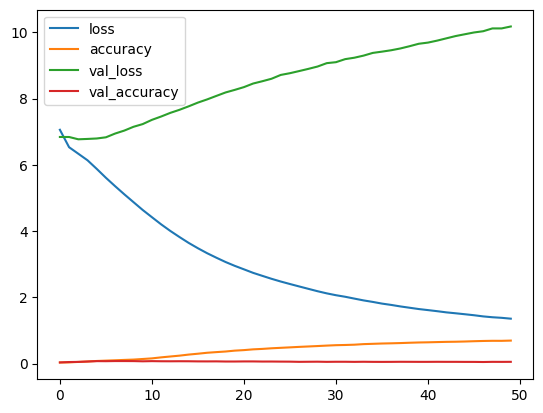

In [37]:
pd.DataFrame(history2.history).plot()